# Main Idea

Best place to live as a pigeon

# Metric

average number of cars in neighborhoods

In [ ]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [2]:
traffic = pd.read_csv("traffic.csv")

In [3]:
grouped_data = traffic.groupby('neighborhood').sum()

In [27]:
neighborhood_count = {}
for index, row in traffic.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood not in neighborhood_count:
        neighborhood_count[neighborhood] = 1
    else:
        neighborhood_count[neighborhood] += 1


In [47]:
sorted_neighborhoods = {k: v for k, v in sorted(neighborhood_count.items(), key=lambda item: item[1], reverse=True)}


In [48]:
count = 5
for neighborhood, count in sorted_neighborhoods.items():
    print(f"{neighborhood}: {count}")
    count -= 1
    if count == 0:
        break

Squirrel Hill South: 28
Bloomfield: 21
Shadyside: 18
East Liberty: 16
Highland Park: 16
Mount Washington: 16
Perry North: 14
Squirrel Hill North: 12
Brookline: 12
Point Breeze: 12
Homewood South: 12
Larimer: 11
Strip District: 11
South Side Slopes: 11
Manchester: 10
Carrick: 10
Central Lawrenceville: 8
Central Oakland: 8
Bluff: 8
North Oakland: 8
Morningside: 8
Central Northside: 7
Greenfield: 7
East Hills: 7
Marshall-Shadeland: 7
Polish Hill: 6
Perry South: 6
Hazelwood: 5
Elliott: 5
South Side Flats: 4
South Oakland: 4
Westwood: 4
Beechview: 4
Upper Hill: 4
Stanton Heights: 4
Lincoln-Lemington-Belmar: 4
Sheraden: 4
Homewood North: 4
California-Kirkbride: 4
Brighton Heights: 4
Windgap: 3
North Shore: 3
Lower Lawrenceville: 3
Arlington: 3
Spring Hill-City View: 3
South Shore: 2
Friendship: 2
Knoxville: 2
West Oakland: 2
Overbrook: 2
Central Business District: 2
St. Clair: 2
Point Breeze North: 2
Beltzhoover: 2
nan: 2
Summer Hill: 2
Crafton Heights: 1


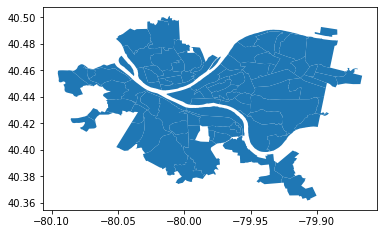

In [38]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods['hood'] = neighborhoods['hood'].str.lower()
neighborhoods.plot() # plot the geopandas dataframe

In [39]:
# do the merge
count_map = neighborhoods.merge(s, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
count_map[['hood','count','geometry']].head()


,hood,count,geometry
0,central oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,north oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,west oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,crawford-roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,strip district,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


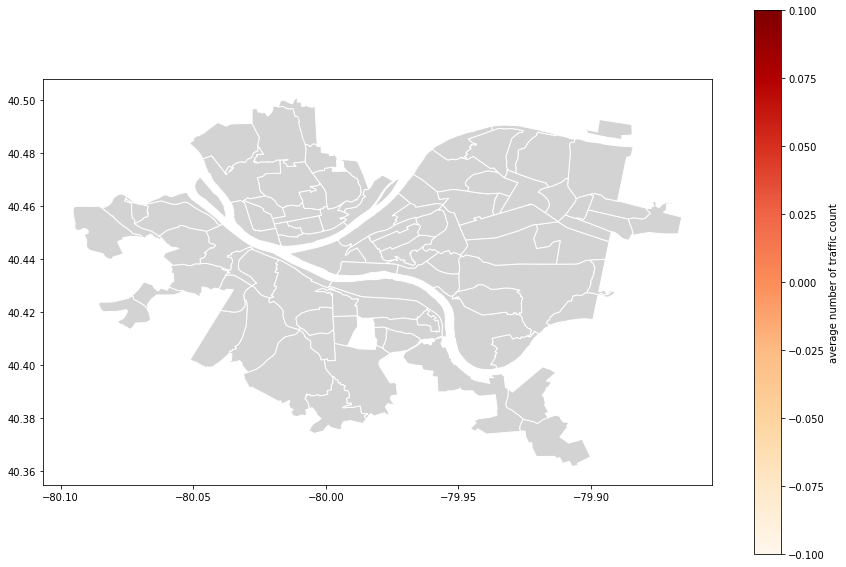

In [42]:
count_map.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "average number of traffic count"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )